<a href="https://colab.research.google.com/github/YudyMancipe/Data_Analysis_Portfolio/blob/main/Copia_de_ProyectoSalud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Factores de Riesgo para Enfermedades Cardiovasculares**

### Nombre:
Yudy Alexandra Mancipe Diaz



# **Problema a resolver:**

En el contexto de salud pública, la prevalencia de enfermedades cardiovasculares está asociada con varios factores como la edad, el nivel de colesterol, y la glucosa en sangre. Sin embargo, es fundamental identificar cómo estas variables interactúan entre sí y cómo afectan la salud cardiovascular en diferentes grupos de población. El problema a resolver es entender cómo las características demográficas y de salud de los individuos influyen en el riesgo de enfermedades cardiovasculares, con el objetivo de identificar patrones y posibles áreas de intervención.

# **Objetivos:**

Objetivo general: Analizar la relación entre las características demográficas (edad, género) y los factores de salud (colesterol, glucosa, presión arterial) con el riesgo de enfermedades cardiovasculares en una población de estudio.

# **Objetivos específicos:**

1. Realizar un análisis descriptivo de los datos para obtener una visión general de las características demográficas y de salud de la población.

2. Identificar y analizar la distribución de la edad en diferentes rangos de colesterol y glucosa para entender su influencia en el riesgo cardiovascular.

3. Evaluar la correlación entre las variables clave (edad, colesterol, glucosa, presión arterial) para identificar patrones que puedan estar relacionados con enfermedades cardiovasculares.

4. Visualizar las relaciones entre las variables de salud, como el colesterol y la glucosa, y su relación con la prevalencia de enfermedades cardiovasculares mediante gráficos y mapas de calor.

5. Generar un análisis de la cantidad de personas por rango de edad para observar cómo varía el riesgo cardiovascular en diferentes etapas de la vida.




Paso 1: Importar Bibliotecas Necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib
import seaborn as sns

Paso 2: Cargar los Datos

In [ ]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('medical_examination.csv')
# Mostrar las primeras filas del dataframe
print(df.head())
# Cargar datos desde un archivo CSV
df = pd.read_csv('medical_examination.csv')
# Convertir 'age' de días a años (suponiendo que 'age' está en días)
df['age'] = df['age'] / 365.25  # Divide por el promedio de días por año

# Opcional: redondear la edad a un número entero
df['age'] = df['age'].round()
# Mostrar las primeras filas del dataframe
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    1

Paso 3: Limpiar los Datos

In [ ]:
#Reemplazamos los valores faltantes y eliminamos duplicados.
# Reemplazar valores faltantes con la media de cada columna
df.fillna(df.mean(), inplace=True)
# Eliminar registros duplicados
df.drop_duplicates(inplace=True)
print(df.head())

   id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


Paso 4: Análisis Exploratorio de Datos (EDA)

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     53.303157      1.349843    164.359229     74.205690   
std    28851.302323      6.760171      0.477253      8.210126     14.395757   
min        0.000000     30.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     54.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     65.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

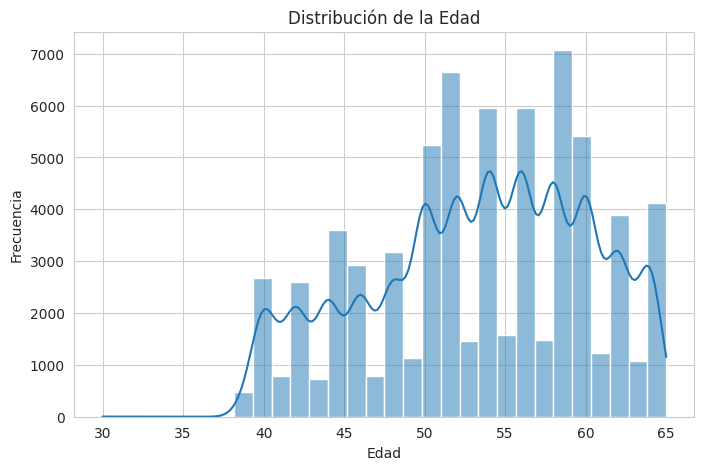

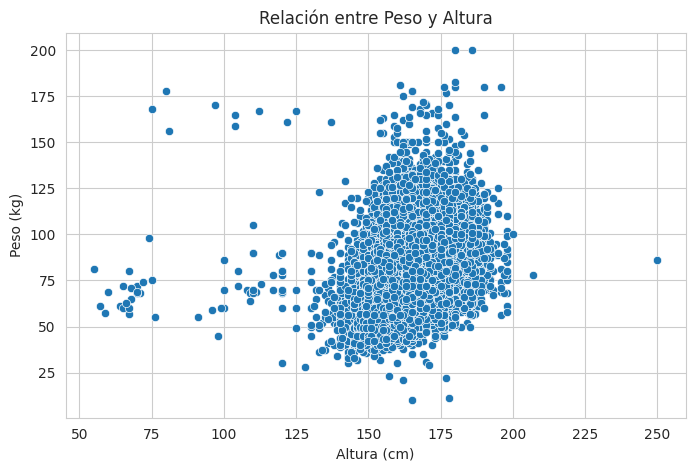

In [ ]:
# Realizamos un análisis exploratorio de datos para entender mejor el conjunto de datos.
# Descripción estadística del dataframe
print(df.describe())
# Distribución de la edad
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# Relación entre peso y altura
plt.figure(figsize=(8, 5))
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Relación entre Peso y Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

Paso 5: Análisis de Correlación

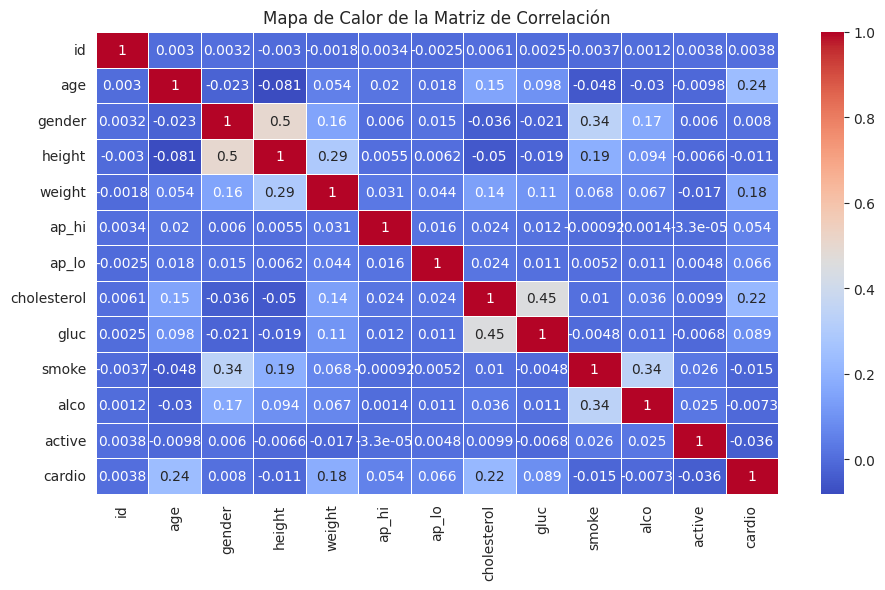

In [ ]:
# Matriz de correlación
corr_matrix = df.corr()
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(11, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Paso 6: Visualización de Datos Médicos

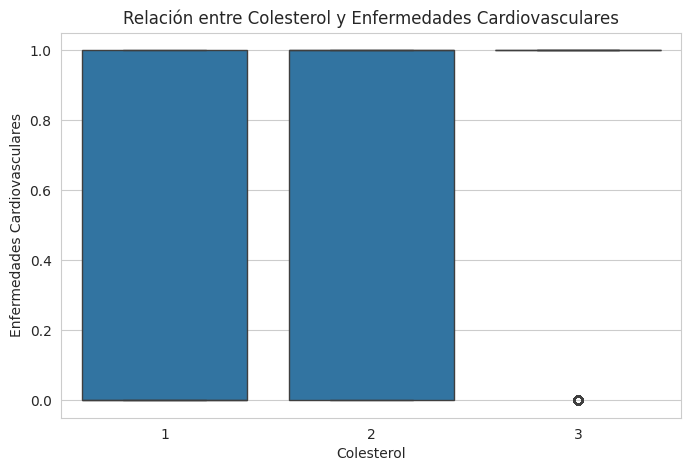

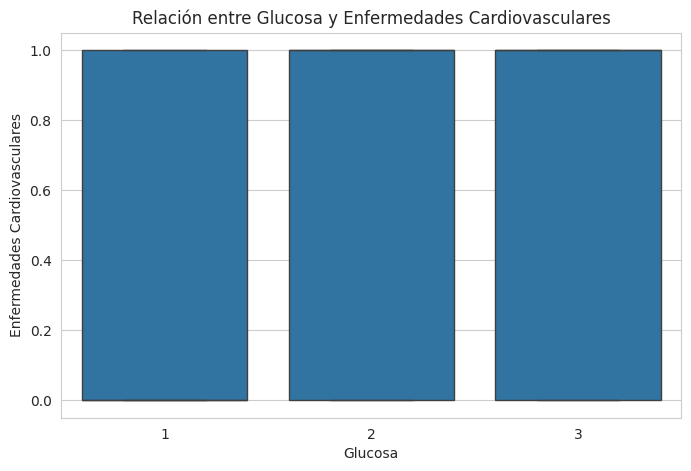

In [ ]:
# Relación entre colesterol y enfermedades cardiovasculares
plt.figure(figsize=(8, 5))
sns.boxplot(x='cholesterol', y='cardio', data=df)
plt.title('Relación entre Colesterol y Enfermedades Cardiovasculares')
plt.xlabel('Colesterol')
plt.ylabel('Enfermedades Cardiovasculares')
plt.show()
# Relación entre glucosa y enfermedades cardiovasculares
plt.figure(figsize=(8, 5))
sns.boxplot(x='gluc', y='cardio', data=df)
plt.title('Relación entre Glucosa y Enfermedades Cardiovasculares')
plt.xlabel('Glucosa')
plt.ylabel('Enfermedades Cardiovasculares')
plt.show()

# Paso 8 Agregados

Cantidad de Personas por Rango de Edad

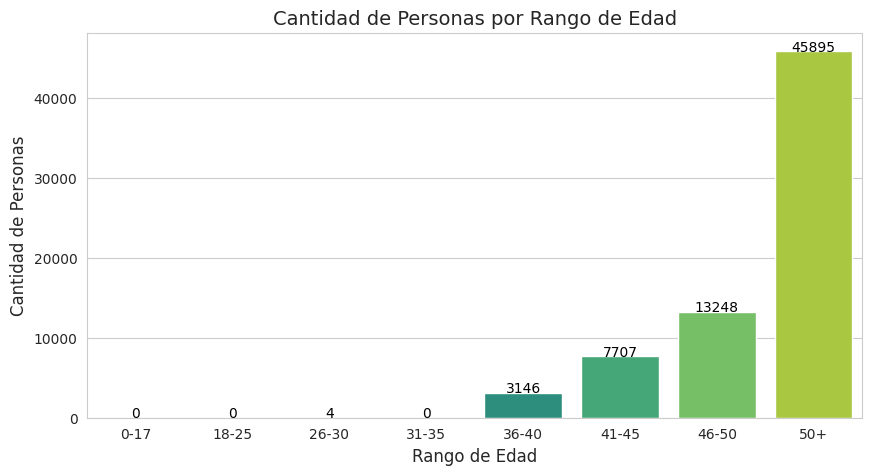

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de rangos de edad con los intervalos especificados
df['rango_edad'] = pd.cut(df['age'], bins=[0, 17, 25, 30, 35, 40, 45, 50, float('inf')],
                          labels=['0-17', '18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna de rangos de edad con los intervalos especificados
df['rango_edad'] = pd.cut(df['age'], bins=[0, 17, 25, 30, 35, 40, 45, 50, float('inf')],
                          labels=['0-17', '18-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+'])

# Contar el número de personas en cada rango de edad usando la columna 'id'
conteo_por_rango = df.groupby('rango_edad', observed=False)['id'].count().reset_index()
conteo_por_rango.columns = ['Rango de Edad', 'Cantidad de Personas']

# Configuración del gráfico
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Crear gráfico de barras con hue para evitar advertencia y sin leyenda
ax = sns.barplot(x='Rango de Edad', y='Cantidad de Personas', hue='Rango de Edad', data=conteo_por_rango,
                 palette="viridis", legend=False)

# Agregar los valores totales en la parte superior de cada barra
for index, row in conteo_por_rango.iterrows():
    ax.text(index, row['Cantidad de Personas'] + 1, row['Cantidad de Personas'], color='black', ha="center")

# Agregar título y etiquetas en español
plt.title('Cantidad de Personas por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)

# Mostrar el gráfico
plt.show()

Distribución de la Edad por Niveles de Colesterol

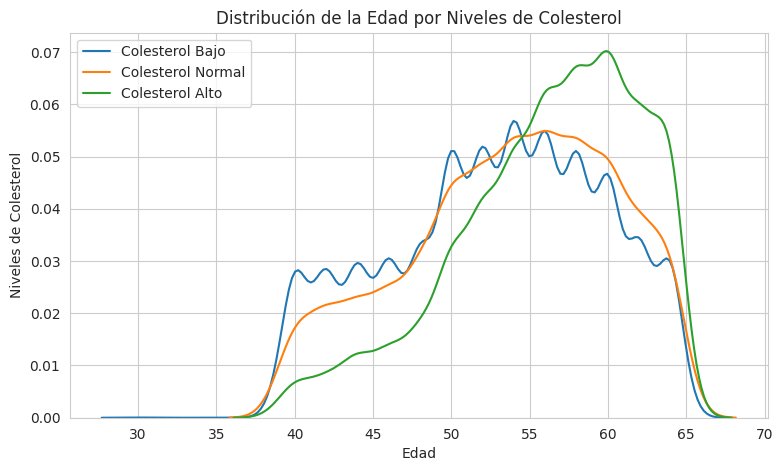

In [ ]:
# Distribución de la Edad por Niveles de Colesterol

plt.figure(figsize=(9, 5))
sns.kdeplot(df[df['cholesterol'] == 1]['age'], label="Colesterol Bajo")
sns.kdeplot(df[df['cholesterol'] == 2]['age'], label="Colesterol Normal")
sns.kdeplot(df[df['cholesterol'] == 3]['age'], label="Colesterol Alto")
plt.title('Distribución de la Edad por Niveles de Colesterol')
plt.xlabel('Edad')
plt.ylabel('Niveles de Colesterol')
plt.legend()
plt.show()

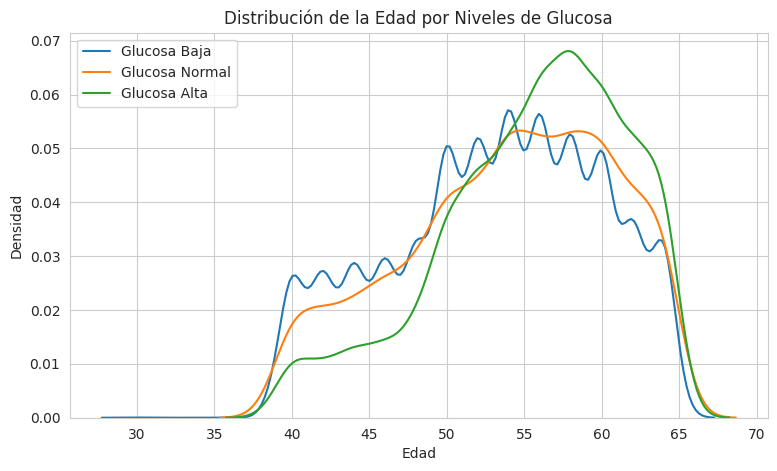

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la Edad por Niveles de Glucosa
plt.figure(figsize=(9, 5))

# Graficar para cada nivel de glucosa
sns.kdeplot(df[df['gluc'] == 1]['age'], label="Glucosa Baja")
sns.kdeplot(df[df['gluc'] == 2]['age'], label="Glucosa Normal")
sns.kdeplot(df[df['gluc'] == 3]['age'], label="Glucosa Alta")

# Título y etiquetas
plt.title('Distribución de la Edad por Niveles de Glucosa')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

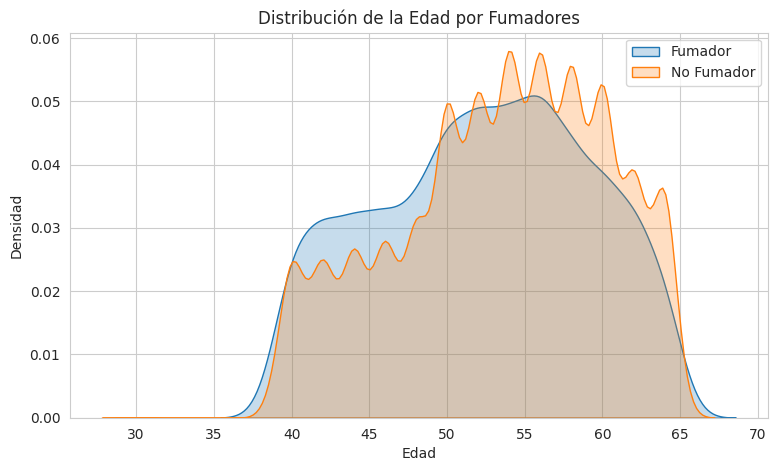

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la Edad por Fumadores
plt.figure(figsize=(9, 5))

# Graficar para fumadores (smoke == 1) y no fumadores (smoke == 0)
sns.kdeplot(df[df['smoke'] == 1]['age'], label="Fumador", fill=True)
sns.kdeplot(df[df['smoke'] == 0]['age'], label="No Fumador", fill=True)

# Título y etiquetas
plt.title('Distribución de la Edad por Fumadores')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Correlacion entre Edad y Presion Arterial

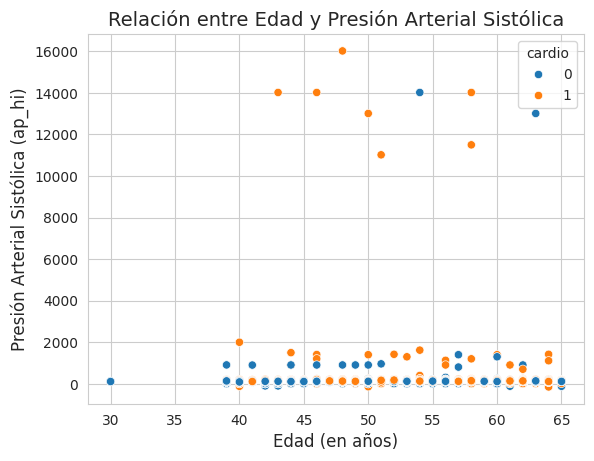

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Crear el gráfico
sns.scatterplot(data=df, x='age', y='ap_hi', hue='cardio')

# Agregar título y etiquetas
plt.title('Relación entre Edad y Presión Arterial Sistólica', fontsize=14)
plt.xlabel('Edad (en años)', fontsize=12)
plt.ylabel('Presión Arterial Sistólica (ap_hi)', fontsize=12)

# Mostrar el gráfico
plt.show()


Comparar la media de las variables numéricas

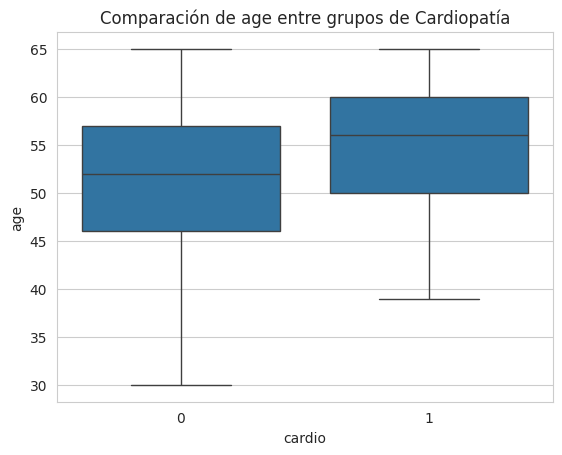

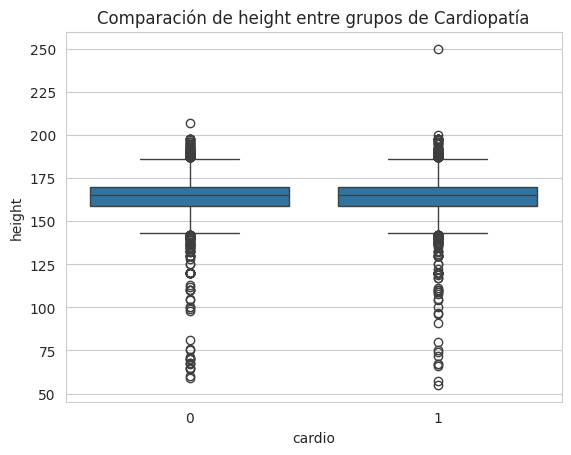

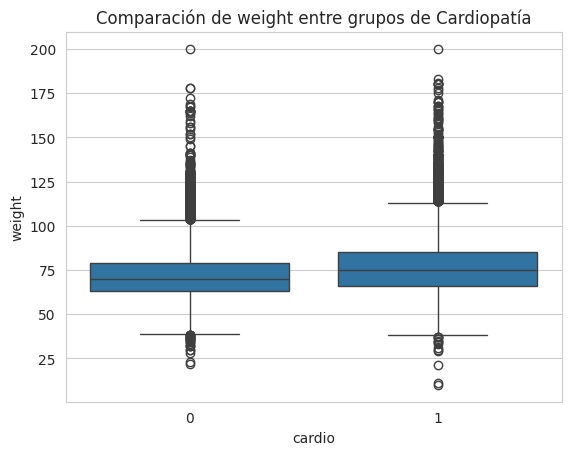

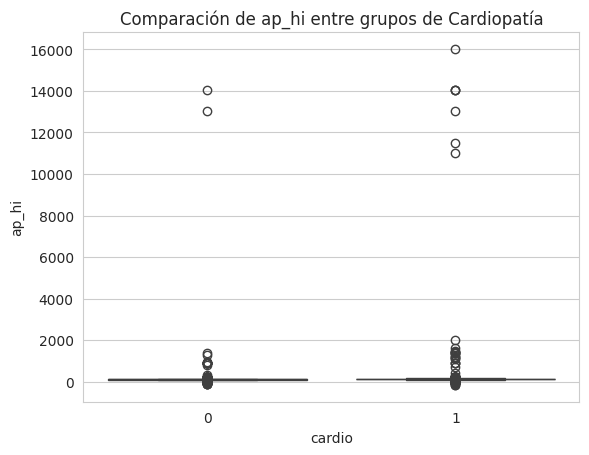

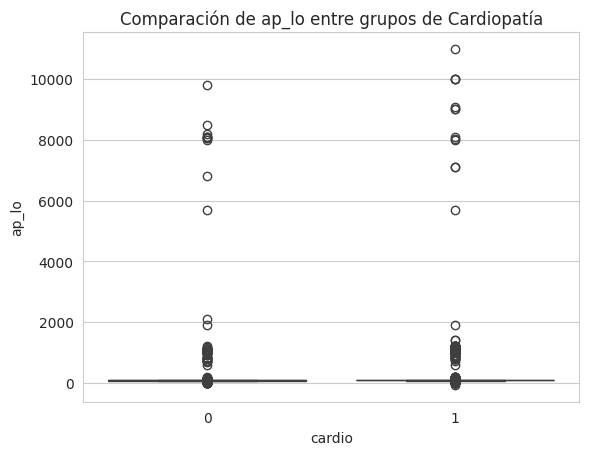

In [ ]:
# Comparar la media de las variables numéricas
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for col in numerical_columns:
    sns.boxplot(data=df, x='cardio', y=col)
    plt.title(f'Comparación de {col} entre grupos de Cardiopatía')
    plt.show()

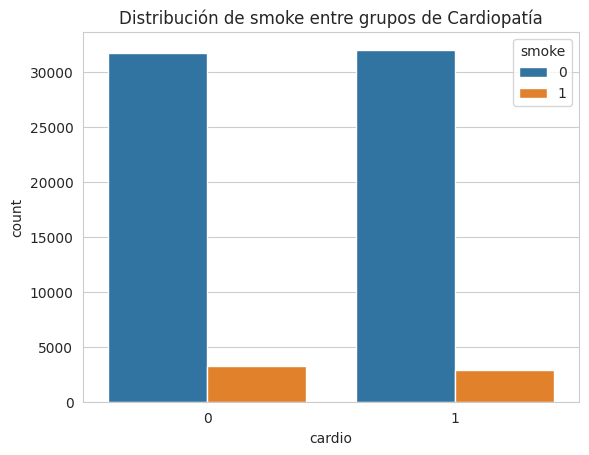

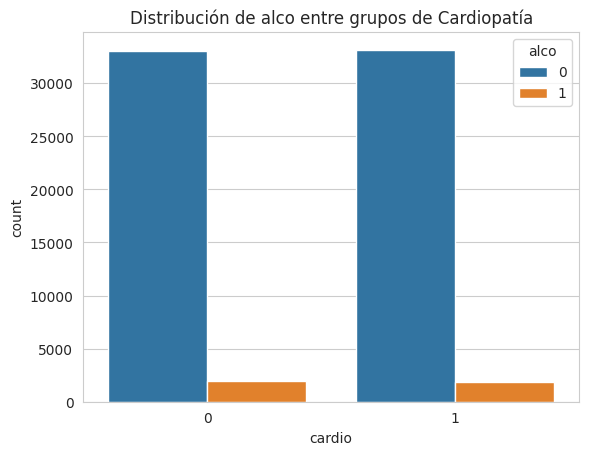

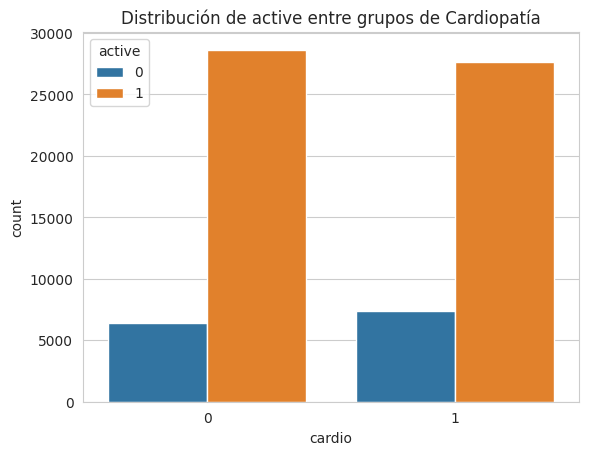

In [ ]:
categorical_columns = ['smoke', 'alco', 'active']
for col in categorical_columns:
    sns.countplot(data=df, x='cardio', hue=col)
    plt.title(f'Distribución de {col} entre grupos de Cardiopatía')
    plt.show()

# **Conclusiones**

1. La base de datos tien un nivel alto de datos en personas mayores de 50 años.
2. De acuerdo con La gráfica de barras "Distribución por edad" se evidencia que  la mayoría de las personas se encuentran en el rango de edad de 40 a 60 años. Los rangos de edad más jóvenes (0-17 y 18-25) tienen una menor representación en el conjunto de datos.


3. En razon a la grafica "Distribución de la Edad por Niveles de Colesterol" se podria analizar que a mayor edad mayor aumento de los niveles colesterol, sin embargo como se analizo anteioremente la base de datos contiene personas mayores a los 35 años.  Tambien se puede analizar que las personas a apartir de los 50 años aproximadamente empiezan a tener niveles de colesterol altos.

4. con relación a la grafica de "Distribución de la Edad por Niveles de Glucosa" Se observa una tendencia clara a que los niveles de glucosa alta se incrementen a medida que aumenta la edad. La curva correspondiente a la glucosa alta presenta un pico más pronunciado y se desplaza hacia la derecha en comparación con las otras dos curvas. Esto sugiere que la probabilidad de tener niveles altos de glucosa es mayor en los grupos de edad más avanzada.

5. En general, las personas con cardiopatía tienden a tener una edad promedio ligeramente mayor en comparación con aquellas sin cardiopatía.
La edad no es el único factor determinante para desarrollar cardiopatía, ya que existen personas jóvenes con esta condición y personas mayores sin ella.